< Machine Learning >

Term Project : Recommendation System

Content Filtering : K-means Clustering

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("movies_metadata.csv")

# 숫자 column 아닌 거 drop.
df.drop(df.index[19730],inplace=True)
df.drop(df.index[29502],inplace=True)
df.drop(df.index[35585],inplace=True)

df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]
print(df_numeric.head(),"\n")

# Check Null.
print(df_numeric.isnull().sum(),"\n")
df_numeric.dropna(inplace=True)



     budget popularity      revenue  runtime  vote_average  vote_count  \
0  30000000  21.946943  373554033.0     81.0           7.7      5415.0   
1  65000000  17.015539  262797249.0    104.0           6.9      2413.0   
2         0    11.7129          0.0    101.0           6.5        92.0   
3  16000000   3.859495   81452156.0    127.0           6.1        34.0   
4         0   8.387519   76578911.0    106.0           5.7       173.0   

                         title  
0                    Toy Story  
1                      Jumanji  
2             Grumpier Old Men  
3            Waiting to Exhale  
4  Father of the Bride Part II   

budget            0
popularity        3
revenue           3
runtime         260
vote_average      3
vote_count        3
title             3
dtype: int64 



In [ ]:
# 영화 얼마나 평가되었는 지 확인.
print(df_numeric['vote_count'].describe(),"\n")

# 대부분(50%) 영화가 10번 미만으로 평가됨. 따라서 30표 이상(상위 26%)으로 얻은 영화만 가져오기.
print(df_numeric['vote_count'].quantile(np.arange(.74,1,0.01)),"\n")

df_numeric = df_numeric[df_numeric['vote_count']>30]
# print(df_numeric.shape) # (12178, 7)



count    12178.000000
mean       388.336591
std        891.671853
min         31.000000
25%         50.000000
50%         99.000000
75%        299.000000
max      14075.000000
Name: vote_count, dtype: float64 

0.74     283.00
0.75     299.00
0.76     317.00
0.77     335.00
0.78     356.00
0.79     375.00
0.80     396.00
0.81     425.37
0.82     454.00
0.83     495.82
0.84     533.00
0.85     574.00
0.86     628.00
0.87     685.99
0.88     753.00
0.89     840.53
0.90     924.00
0.91    1021.07
0.92    1148.00
0.93    1318.83
0.94    1518.38
0.95    1730.45
0.96    2086.68
0.97    2550.00
0.98    3298.60
0.99    4732.68
Name: vote_count, dtype: float64 



In [ ]:
#@title Data Normalization

from sklearn import preprocessing

minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))

df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

print(df_numeric_scaled.head())



     budget  popularity   revenue   runtime  vote_average  vote_count
0  0.078947    0.040082  0.133988  0.092360      0.810526    0.383367
1  0.171053    0.031075  0.094261  0.118586      0.726316    0.169610
2  0.000000    0.021389  0.000000  0.115165      0.684211    0.004343
3  0.042105    0.007045  0.029216  0.144812      0.642105    0.000214
4  0.000000    0.015315  0.027468  0.120867      0.600000    0.010111


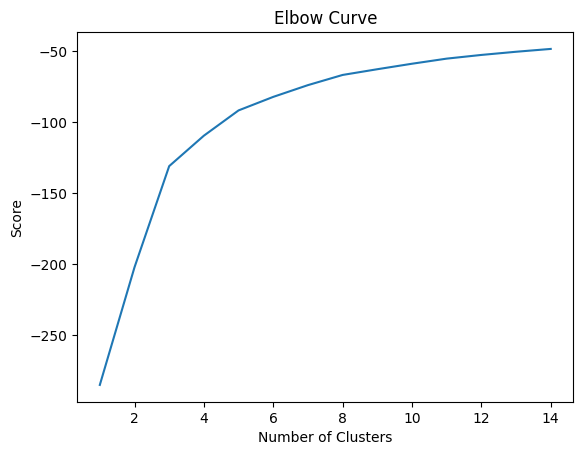

In [ ]:
#@title Select K using Elbow before Use K-Means Clustering

# Select k using Elbow. (1~15)
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()



              revenue     runtime  vote_average   vote_count
cluster                                                     
0        1.041162e+07   93.744831      4.941971   123.530136
1        1.651612e+08  114.280036      6.219964  1152.371274
2        1.678100e+07  109.915865      7.278178   303.730769
3        1.463550e+07  100.451364      6.188294   170.910019
4        6.358566e+08  126.371542      6.917787  4802.359684 



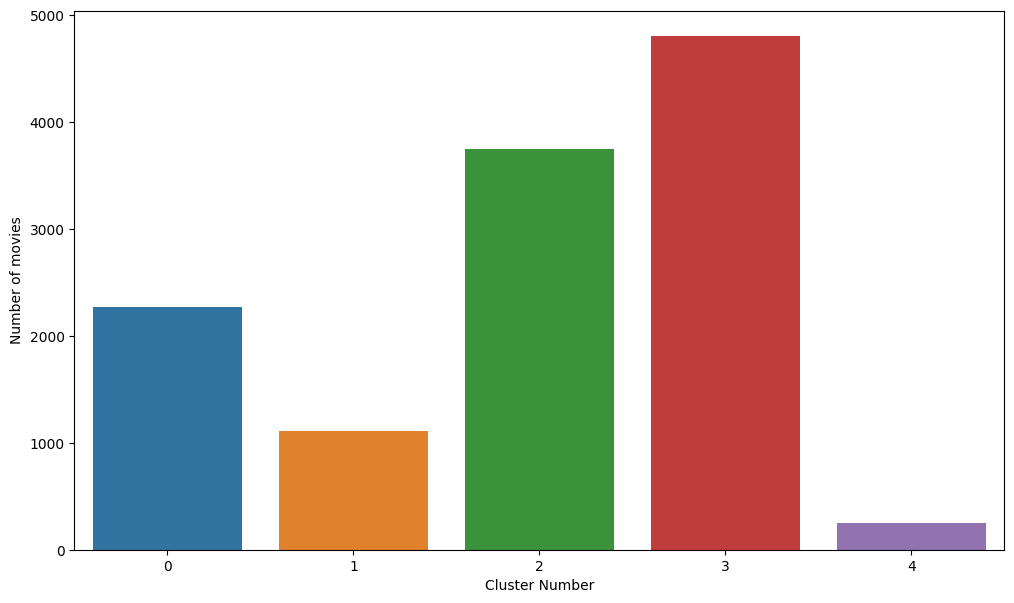

In [ ]:
#@title Get k=5) fit and result K-means Clustering

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

# print(len(kmeans.labels_)) # 12178

df_numeric['cluster'] = kmeans.labels_

# print(df_numeric.head(),"\n") # check labeling

plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

print(df_numeric.groupby(['cluster']).mean(),"\n")



위에서 가장 작은 cluster가 vote_count가 제일 높고, runtime 과 revenue가 가장 높은 movie cluster임. 따라서 이 cluster에 있는 영화 정보를 출력.

In [ ]:

size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)
print("size_array of cluster 0~4 : ",size_array)
size_array=sorted(size_array)
print("Sorted size_array         : ",size_array,"\n")

# 추천될 영화들이 들어있는 cluster의 data 출력(샘플 5개만)
print(df_numeric[df_numeric['cluster']==size_array.index(size_array[0])].sample(5))



size_array of cluster 0~4 :  [2273, 1107, 3744, 4801, 253]
Sorted size_array         :  [253, 1107, 2273, 3744, 4801] 

         budget popularity     revenue  runtime  vote_average  vote_count  \
19956  30000000   3.835131    108348.0    125.0           5.0        41.0   
26314         0   4.604124         0.0     89.0           5.5        34.0   
32844         0   2.173072         0.0     85.0           4.7        35.0   
5342   13000000   8.502529  37664855.0     94.0           4.5       230.0   
15684  30000000   12.17886    967000.0     92.0           5.2       185.0   

                         title  cluster  
19956                     1911        0  
26314              The Lookout        0  
32844          Lost After Dark        0  
5342   Halloween: Resurrection        0  
15684                   TEKKEN        0  
